<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.C - Grafos </h2>
</center>
</p>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Detección de ciclos</p></h2>
  
  <p>
  En este ejercicio deberéis implementar un algoritmo capaz de detectar si un grafo cualquiera contiene ciclos.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo que utilizaremos para buscar ciclos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'TF'_ __: Booleano indicando si el grafo de entrada contiene algún ciclo.</li>
<ul>

</p>

</div>

Install packages.

In [1]:
import sys
!{sys.executable} -m pip install networkx

  Using cached https://files.pythonhosted.org/packages/41/8f/dd6a8e85946def36e4f2c69c84219af0fa5e832b018c970e92f2ad337e45/networkx-2.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8f/b7/f329cfdc75f3d28d12c65980e4469e2fa373f1953f5df6e370e84ea2e875/decorator-4.4.1-py2.py3-none-any.whl


No warnings when using `%matplotlib inline`

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
import networkx as nx 

In [4]:
from random import choice

def cycles(G):
    """
    It's a DFS iterative version 
    that checks if G has a cycle in it.
    
    Worst case scenario is no cycles.
    Would have DFS complexity in that case: O(|E|).
    
    Parameters
    ----------
        G: nx.Graph()
        
    Returns
    -------
        bool
            If G has at least one cycle
    """
    
    has_c = False
    
    stack = []
    discovered = {n: False for n in G.nodes}
    
    stack.append(choice(list(G.nodes)))
    
    while len(stack) != 0 and not has_c:
        v = stack.pop()
        
        if not discovered[v]:
            discovered[v] = True
            
            for w in G.neighbors(v):
                stack.append(w)
                
                if w in [k for k, v in discovered.items() if v]:
                    has_c = True
                
    return has_c

In [5]:
G = nx.generators.barabasi_albert_graph(100, 2)
cycles(G)

True

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Circuito Euleriano</p></h2>
  <p>
  Se define como circuito euleriano aquel que pasa por todas las aristas de un grafo una única vez y que acaba en el mismo lugar en el que empieza. El problema de los caminos eulerianos fué la base de toda la teoría de grafos y fué postulado por Lehonard Euler en el famoso problema de __los siete puentes de Königsberg__. En este problema Euler se preguntaba si podía acabar en el mismo sitio tras cruzar todos los puentes una sola vez.
  </p>
  <img src="img/konigsberg.jpg"></img>
  <p>
  En este ejercicio se os propone implementar un algoritmo que, dado un grafo _G_ encuentre un camino euleriano.
  </p>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Objeto de tipo grafo sobre el cual queremos encontrar el circuito Euleriano.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _nodelist_ __: Una lista de nodos ordenados que formarían el circuito.</li>
<ul>

</p>

</div>

In [6]:
def euler(G, source=0):
    """
    Try to return an eulerian circuit of G.
    Reference: https://cp-algorithms.com/graph/euler_path.html
    
    Parameters
    ----------
        G: nx.Graph()
        
        source: int
            The source node index
        
    Returns
    -------
        generator
            The eulerian circuit node list
    """
    
    # Generate a copy of the given graph,
    # as we will be deleting edges and we 
    # do not want to modify the arguments
    _G = nx.from_edgelist(G.edges)
    
    # Init the stack
    s = [source]
    
    while len(s) != 0:
        # Pop the last element of the stack
        w = s[-1]
        
        # If w has no adjacent nodes,
        # remove it from the stack and
        # yield it
        if sum(1 for _ in _G.neighbors(w)) == 0:
            yield w
            s.pop()
        
        # Get the first adjacent node e to w,
        # remove the edge from w to e
        # and add e to the stack 
        else:
            e = next(_G.neighbors(w))
            _G.remove_edge(w, e)
            s.append(e)

[2, 4, 3, 1, 4, 0, 3, 2, 1, 0, 2]


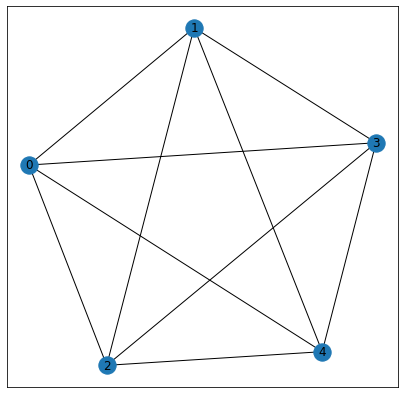

In [7]:
%matplotlib inline
from utils import draw
gg = nx.complete_graph(5)
draw(gg)
e = euler(gg, source=2)
print(list(e))

### Speed test `euler()` v.s. `nx.eulerian_circuit()`

In [8]:
from time import time
from random import randint
from tqdm import tqdm_notebook as tqdm

e_mean, nx_mean = 0.0, 0.0
N = 10**3

for i in tqdm(range(N)):
    # We generate an odd complete graph (N),
    # so each node will have and even 
    # number of neighbors (N-1)
    _G = nx.complete_graph(2 * randint(10**1, 10**2) + 1)
    
    t = time()
    _nx_euler = nx.eulerian_circuit(_G)
    nx_mean += time() - t
    
    t = time()
    _euler = euler(_G)
    e_mean += time() - t
    
    assert [_n for _n in _euler] == [u for u,_ in _nx_euler] + [0]

nx_mean = nx_mean / N
e_mean = e_mean / N

print(f"Mean time for {N} iterations")
print(f"eulerian_circuit(): {nx_mean:2.5} s.")
print(f"euler():            {e_mean:2.5} s.")


Mean time for 1000 iterations
eulerian_circuit(): 8.966e-06 s.
euler():            2.8355e-06 s.


<div class="alert alert-warning">
<h1>Pregunta</h1>
<p><strong>
¿Qué condiciones se deben de cumplir para que un grafo cualquiera contenga un camino euleriano? Demuéstralo.
</strong></p>
</div>

### Teorema
Un grafo no dirigido $G$ tiene un ciclo euleriano si y solo si todos los nodos son de grado par y los nodos con grado no nulo percenecen a la misma componente conexa.

#### Demostración

$\Rightarrow$ 

Si $G$ es un grafo Euleriano, contiene un camino euleriano, entonces $\forall v\in V$ el numero de vertices adyacentes a $v$ es el doble de veces que pasa el camino por $v$, por tanto $d(v)$ es par.
    
$\Leftarrow$ 

Supongamos que todos los nodos de $G$ tiene grado par pero $G$ no es euleriano. De todos los subgrafos posibles elegimos $H$ el que tenga menor numero de vertices y cumpla que es conexo, todos sus nodos son de grado par y no es euleriano, que existe dado que $G$ lo es y existen un numero finito de subgrafos. $H$ contiene un ciclo, y por lo tanto un camino cerrado. De todos los caminos cerrados de $H$ elegimos el que mas aristas tenga $C$.

Sea $H'$ un componente conexa de $H\setminus{E(C)}$ ($H$ sin las aristas de $C$), tal que $H'$ tenga almenos una arista. Ahora notamos que todo nodo $v$ de $H'$ tiene grado $d_{H'}(v)=d_{H}(v)-d_{C}(v)$ que es par, por lo tanto $H'$ debe ser un grafo euleriano. Y notamos que $C$ y $H'$ comparten almenos un vertice.

Finalmente, si juntamos $C$ y $H'$ obtenemos un camino cerrado en $H$, con mas aristas que el camino $C$, lo qual es una contradiccion porque $C$ era el camino cerrado de $H$ con mas aristas. Por lo tanto, $G$ es un grafo euleriano.

$\square$

### Corolario
Un grafo no dirigido $G$ tiene un camino euleriano si y solo si tiene exactamentes dos nodos de grado impar, i los nodos con grado no nulo percenecen a la misma componente conexa. En este caso el camino euleriano empieza y acaba en esos dos vertices.

<div class="alert alert-warning">
<h1>Extra</h1>
<p><strong>
Además de circuitos Eulerianos, definimos caminos Eulerianos aquellos que recorren todas las aristas de un grafo sin repetirlas, pero no termina en el mismo nodo que empieza. Modifica el algoritmo anterior para que sea capaz de detectar si el grafo contiene un ciclo o un camino Euleriano, y devuelva la lista de nodos ordenados que componen dicho ciclo o camino. Tened en cuenta que son casos excluyentes.
</strong></p>
</div>